<a href="https://colab.research.google.com/github/Rebootannie/Driver-drowsiness/blob/main/Cloudcredits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 1

Missing Values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None

Summary Stat

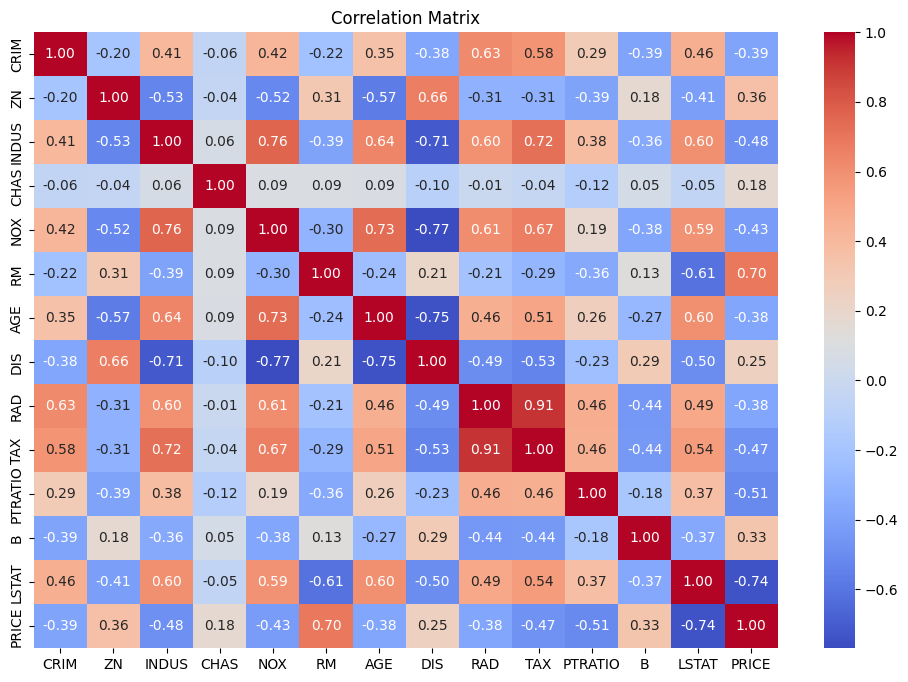

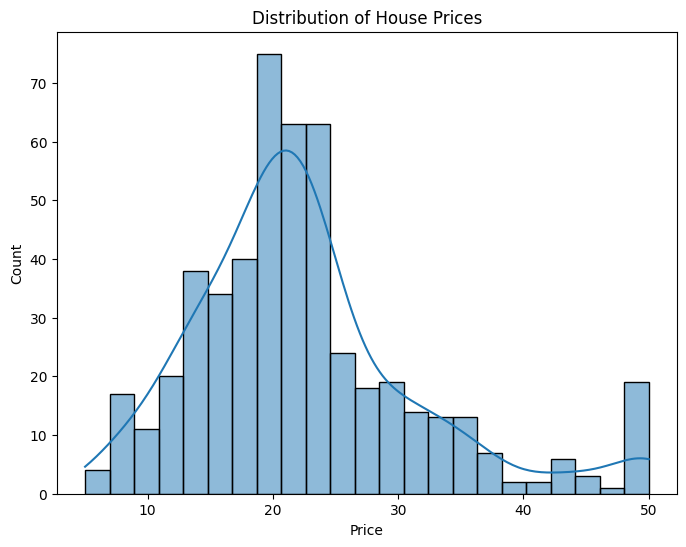


Selected Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

Training set size: (404, 8)
Testing set size: (102, 8)

Model Selected: Linear Regression
Model Training Completed

Model Evaluation:
Mean Squared Error (MSE): 26.09
R² Score: 0.64
5-Fold Cross-Validation R² Scores: [ 0.6628963   0.70883443  0.56313742  0.05602014 -0.55200478]
Average CV R² Score: 0.29 (±0.96)


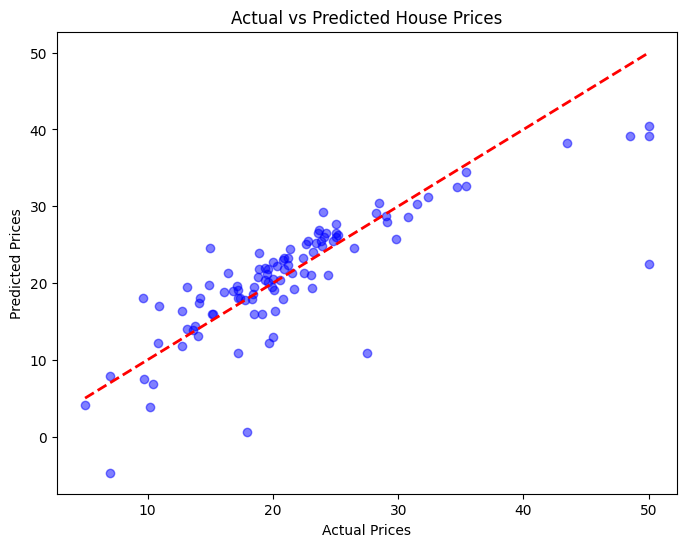

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# Load the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Define feature names
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Create DataFrame
df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Step 3: Exploratory Data Analysis (EDA)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualize distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['PRICE'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

# Step 4: Feature Engineering
# Select top k features based on f_regression
selector = SelectKBest(score_func=f_regression, k=8)
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("\nSelected Features:", selected_features)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Step 6: Choose a Model
model = LinearRegression()
print("\nModel Selected: Linear Regression")

# Step 7: Train the Model
model.fit(X_train, y_train)
print("Model Training Completed")

# Step 8: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Cross-validation to assess model stability
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"5-Fold Cross-Validation R² Scores: {cv_scores}")
print(f"Average CV R² Score: {cv_scores.mean():.2f} (±{cv_scores.std() * 2:.2f})")

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

#TASK 2


Task 2: Iris Flower Classification
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000  

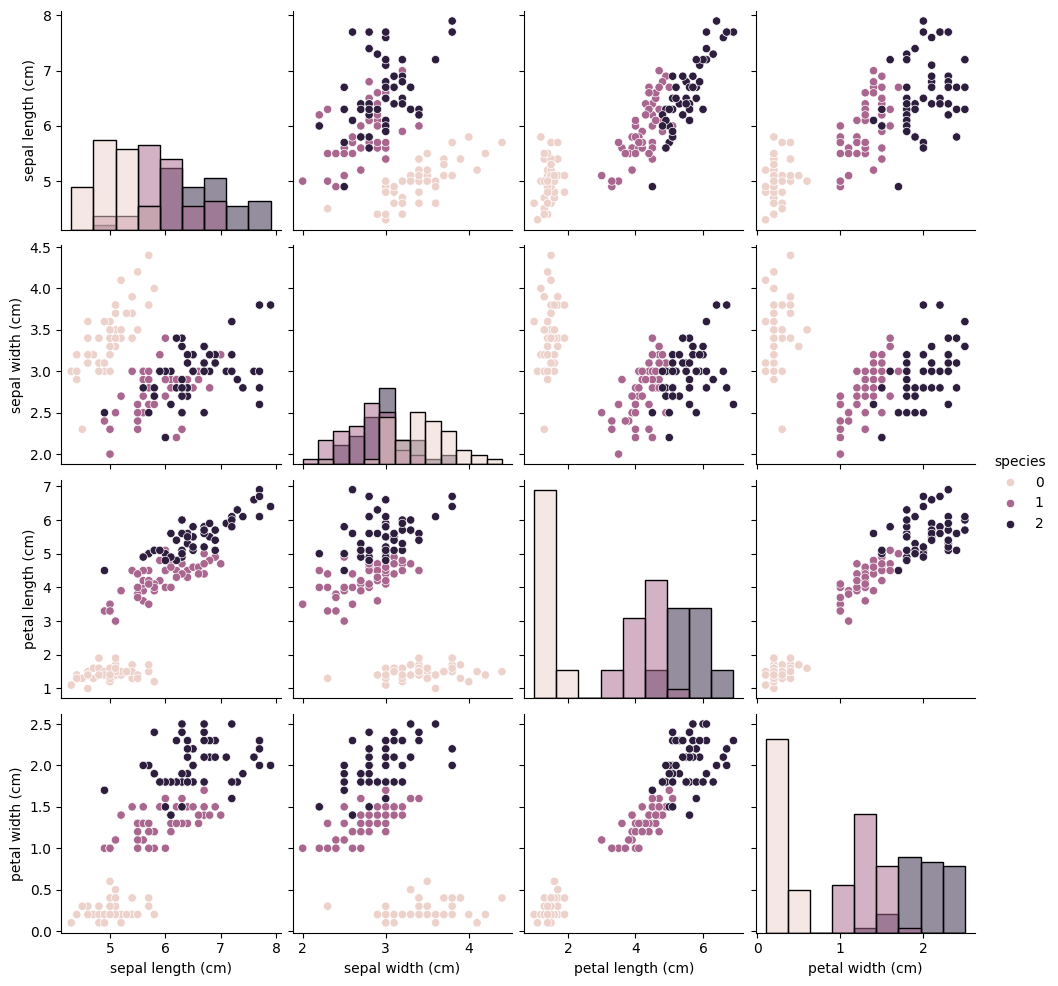

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy: 0.97
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


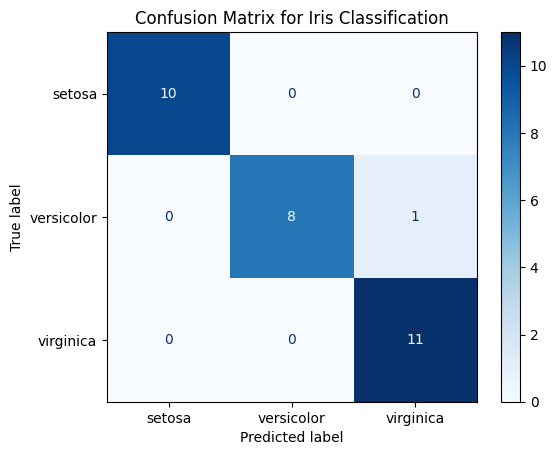

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# 2. Exploratory Data Analysis (EDA)
print("\nTask 2: Iris Flower Classification")
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Visualize pairwise relationships
sns.pairplot(data, hue='species', diag_kind='hist')
plt.show()

# 3. Prepare data
X = data.drop('species', axis=1)
y = data['species']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train the model
model = LogisticRegression(multi_class='ovr', random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

#TASK 3

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Task 3: Handwritten Digit Recognition
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


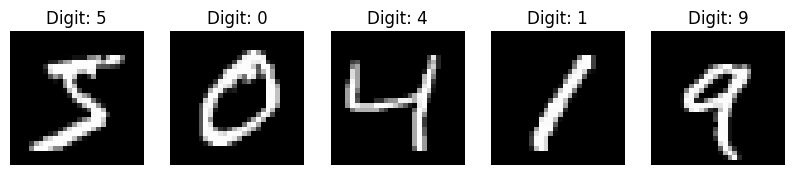

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 108ms/step - accuracy: 0.7767 - loss: 0.7190 - val_accuracy: 0.9760 - val_loss: 0.0791
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9637 - loss: 0.1235 - val_accuracy: 0.9833 - val_loss: 0.0581
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9742 - loss: 0.0849 - val_accuracy: 0.9863 - val_loss: 0.0485
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 77s 101ms/step - accuracy: 0.9794 - loss: 0.0688 - val_accuracy: 0.9872 - val_loss: 0.0452
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9820 - loss: 0.0593 - val_accuracy: 0.9877 - val_loss: 0.0425

Test Accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


<Figure size 1000x800 with 0 Axes>

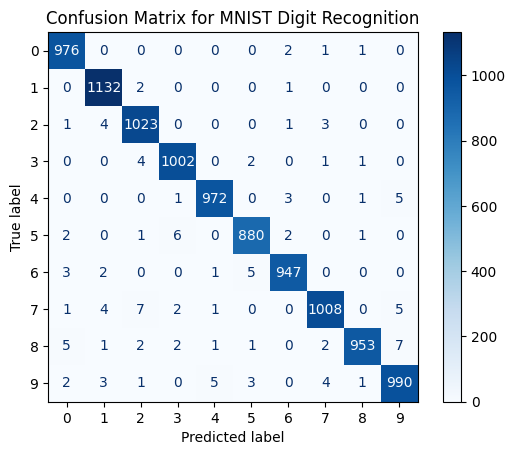

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Exploratory Data Analysis (EDA)
print("\nTask 3: Handwritten Digit Recognition")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Visualize sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')
plt.show()

# 3. Prepare data
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 4. Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# 6. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for MNIST Digit Recognition')
plt.show()

#TASK 4


Task 4: Predicting Titanic Survivors
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


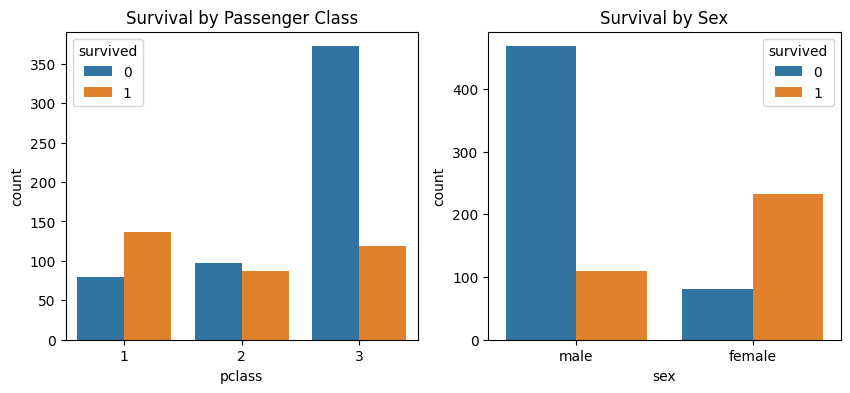


Accuracy: 0.80
Precision: 0.75
Recall: 0.73


<Figure size 600x600 with 0 Axes>

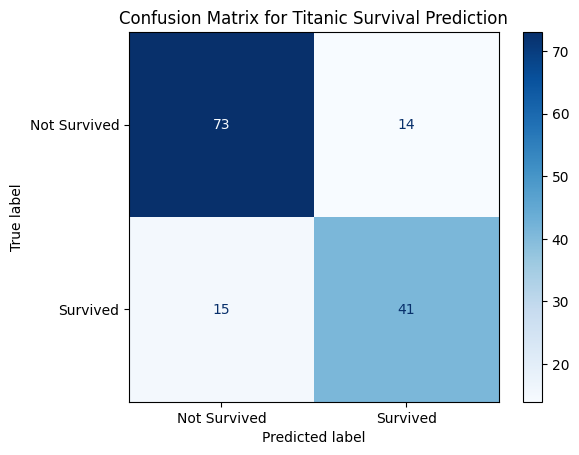

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
# For simplicity, using seaborn's Titanic dataset
titanic = sns.load_dataset('titanic')

# 2. Exploratory Data Analysis (EDA)
print("\nTask 4: Predicting Titanic Survivors")
print("Dataset Info:")
print(titanic.info())

# Visualize survival rates by class and sex
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.subplot(1, 2, 2)
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival by Sex')
plt.show()

# 3. Prepare data
# Select features and handle missing values
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].dropna()

# Encode categorical variables
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])  # Male: 1, Female: 0

X = titanic.drop('survived', axis=1)
y = titanic['survived']

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

#TASK 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# 1. Load the dataset
# Using MovieLens small dataset (ml-latest-small) via surprise
data = Dataset.load_builtin('ml-100k')

# 2. Exploratory Data Analysis (EDA)
# Convert to pandas DataFrame for EDA
raw_data = pd.DataFrame([(x.uid, x.iid, x.r) for x in data.raw_ratings], columns=['user_id', 'movie_id', 'rating'])
print("\nTask 5: Movie Recommendation System")
print("Dataset Info:")
print(raw_data.info())
print("\nRating Distribution:")
print(raw_data['rating'].describe())

# Visualize rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(raw_data['rating'], bins=5, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 3. Prepare data
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(raw_data[['user_id', 'movie_id', 'rating']], reader)

# 4. Split the data
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# 5. Train the model
model = SVD(random_state=42)
model.fit(trainset)

# 6. Evaluate the model
predictions = model.test(testset)
rmse = accuracy.rmse(predictions, verbose=True)

print(f"\nRMSE: {rmse:.2f}")

# Example: Predict rating for a specific user and movie
user_id = '196'
movie_id = '242'
pred = model.predict(user_id, movie_id)
print(f"Predicted rating for user {user_id} and movie {movie_id}: {pred.est:.2f}")

ModuleNotFoundError: No module named 'surprise'

#TASK 6

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Task 6: Sentiment Analysis on Movie Reviews
Training reviews: 25000
Test reviews: 25000


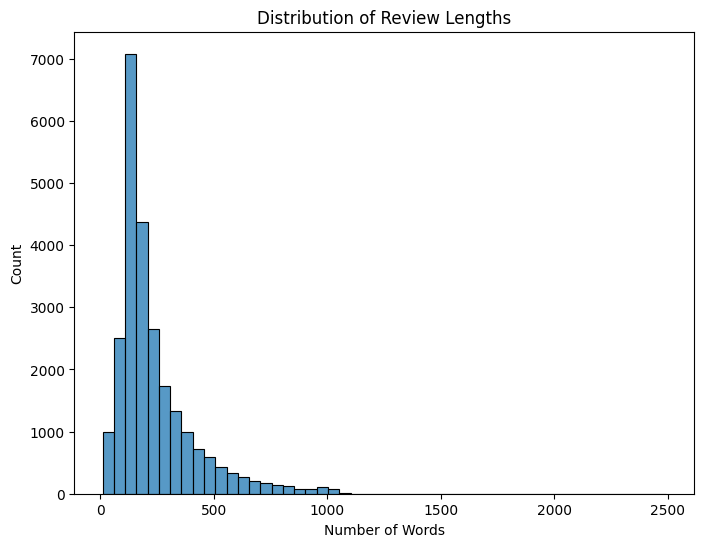

Class Balance (0=Negative, 1=Positive):
1    12500
0    12500
Name: count, dtype: int64

Accuracy: 0.84
F1 Score: 0.84


<Figure size 600x600 with 0 Axes>

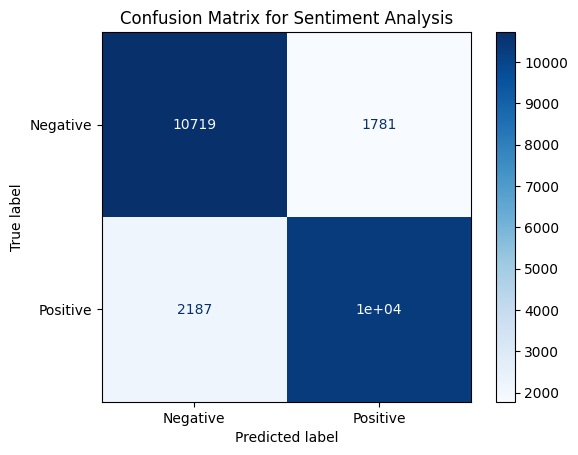

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import imdb

# 1. Load the dataset
# Using Keras IMDb dataset for simplicity
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Convert word indices back to text for TF-IDF
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Decode reviews
X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]

# 2. Exploratory Data Analysis (EDA)
print("\nTask 6: Sentiment Analysis on Movie Reviews")
print(f"Training reviews: {len(X_train_text)}")
print(f"Test reviews: {len(X_test_text)}")

# Analyze review lengths
review_lengths = [len(review.split()) for review in X_train_text]
plt.figure(figsize=(8, 6))
sns.histplot(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

# Class balance
print("Class Balance (0=Negative, 1=Positive):")
print(pd.Series(y_train).value_counts())

# 3. Prepare data
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# 4. Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 5. Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Sentiment Analysis')
plt.show()

#Task 7

Dataset Shape after cleaning: (5572, 2)

Task: Spam Email Detection
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None

Class Balance (0=Ham, 1=Spam):
label
0    0.865937
1    0.134063
Name: proportion, dtype: float64


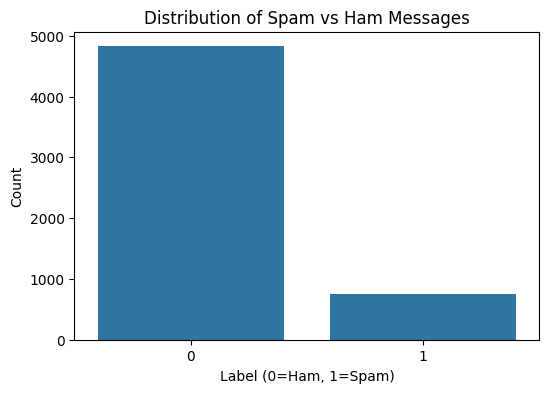

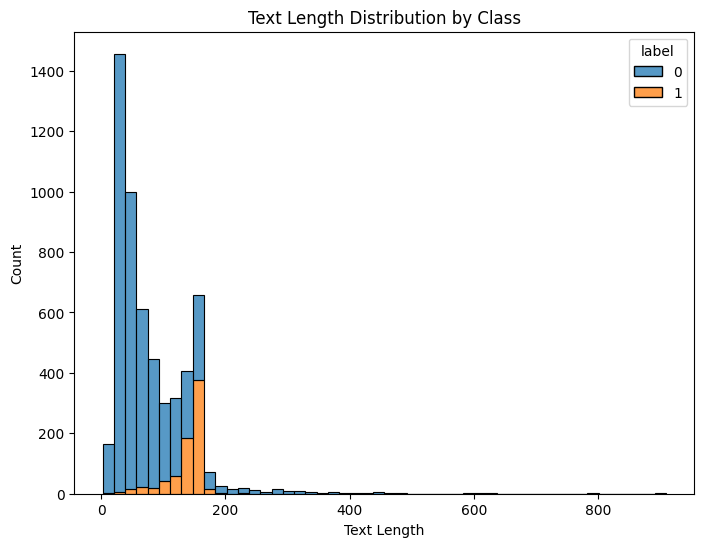


Feature Engineering:
TF-IDF features: 3000, Additional feature: Text length

Training set size: (4457, 3001)
Testing set size: (1115, 3001)

Model Selected: Multinomial Naive Bayes
Model Training Completed

Model Evaluation:
Accuracy: 0.99
Precision: 0.99
Recall: 0.91
F1-Score: 0.94
5-Fold Cross-Validation F1 Scores: [0.9559322  0.94158076 0.93286219 0.92957746 0.93877551]
Average CV F1 Score: 0.94 (±0.02)


<Figure size 600x600 with 0 Axes>

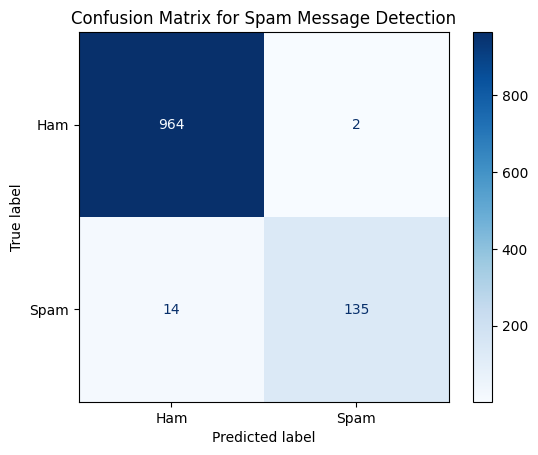

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt', quiet=True)

# Step 1: Define the Problem
"""
Objective: Classify emails as spam (1) or ham (0) using text data.
Problem Type: Binary classification.
Algorithm: Multinomial Naive Bayes (suitable for text data).
Evaluation Metrics: Accuracy, Precision, Recall, F1-Score, Confusion Matrix.
"""

# Step 2: Collect and Prepare Data
# Attempt to load a spam/ham dataset
try:
    # Alternative dataset: Using a publicly available spam/ham dataset (SMS Spam Collection)
    data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv'
    data = pd.read_csv(data_url, sep='\t', header=None, names=['label', 'text'])
    # Map labels to binary
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please provide a local copy of the spam dataset (e.g., spam.csv) with 'label' and 'text' columns.")
    print("Alternatively, download the SMS Spam Collection dataset from:")
    print("https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection")
    print("Expected format: Two columns - 'label' (ham/spam) and 'text' (message content).")
    exit()

# Handle missing values
data = data.dropna()
print(f"Dataset Shape after cleaning: {data.shape}")

# Verify column names
if not all(col in data.columns for col in ['label', 'text']):
    print("Error: Dataset must have 'label' and 'text' columns.")
    exit()

# Step 3: Exploratory Data Analysis (EDA)
print("\nTask: Spam Email Detection")
print("Dataset Info:")
print(data.info())
print("\nClass Balance (0=Ham, 1=Spam):")
print(data['label'].value_counts(normalize=True))

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('Label (0=Ham, 1=Spam)')
plt.ylabel('Count')
plt.show()

# Analyze text length
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='text_length', hue='label', bins=50, multiple='stack')
plt.title('Text Length Distribution by Class')
plt.xlabel('Text Length')
plt.show()

# Step 4: Feature Engineering
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Add text length as a feature
text_length = data['text_length'].values.reshape(-1, 1)
from scipy.sparse import hstack
X = hstack([X, text_length])

print("\nFeature Engineering:")
print(f"TF-IDF features: {X.shape[1] - 1}, Additional feature: Text length")

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Step 6: Choose a Model
model = MultinomialNB(alpha=0.1)  # Adjusted alpha for smoothing
print("\nModel Selected: Multinomial Naive Bayes")

# Step 7: Train the Model
model.fit(X_train, y_train)
print("Model Training Completed")

# Step 8: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f"5-Fold Cross-Validation F1 Scores: {cv_scores}")
print(f"Average CV F1 Score: {cv_scores.mean():.2f} (±{cv_scores.std() * 2:.2f})")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Spam Message Detection')
plt.show()

#TASK 8


Task 8: Predicting Diabetes
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Class Balance (0=No Diabetes, 1=Diabetes):
outcome
0    500
1    268
Name: count, dtype: int64


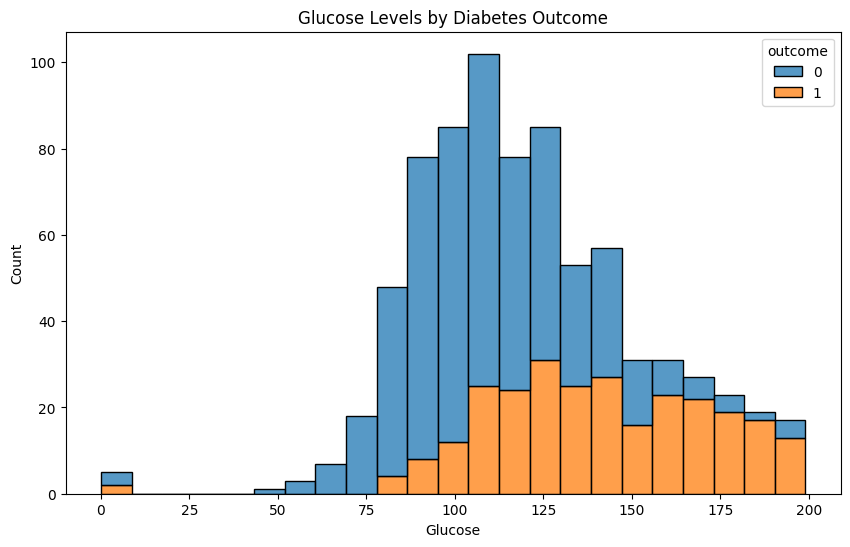


Accuracy: 0.73
Precision: 0.61
Recall: 0.69


<ipython-input-3-2422cbd32ae5>:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.median(), inplace=True)


<Figure size 600x600 with 0 Axes>

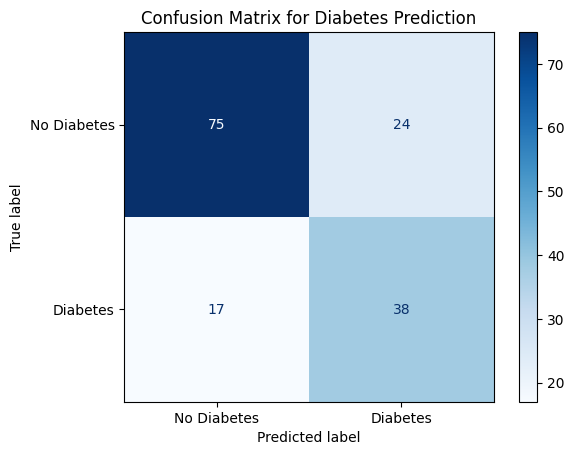

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load the dataset
# Pima Indians Diabetes Dataset (available from UCI or Kaggle)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
data = pd.read_csv(url, names=columns)

# 2. Exploratory Data Analysis (EDA)
print("\nTask 8: Predicting Diabetes")
print("Dataset Info:")
print(data.info())

# Class balance
print("\nClass Balance (0=No Diabetes, 1=Diabetes):")
print(data['outcome'].value_counts())

# Visualize feature distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='glucose', hue='outcome', multiple='stack')
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

# 3. Prepare data
# Replace 0 values with NaN for certain columns (as 0 is unrealistic)
for col in ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']:
    data[col] = data[col].replace(0, pd.NA)

# Impute missing values with median
data.fillna(data.median(), inplace=True)

X = data.drop('outcome', axis=1)
y = data['outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()

#TASK 9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
import sys
warnings.filterwarnings('ignore')

# Step 1: Define the Problem
"""
Objective: Predict future Apple stock closing prices using historical data.
Problem Type: Time-series regression.
Algorithm: LSTM (Long Short-Term Memory) neural network.
Evaluation Metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE).
"""

# Step 2: Collect and Prepare Data
data = None
# Option 1: Try loading from yfinance (with rate limit retry)
try:
    print("Attempting to download AAPL data from Yahoo Finance...")
    stock_data = yf.download('AAPL', start='2018-01-01', end='2024-12-31', progress=False)
    if stock_data.empty or len(stock_data) == 0:
        raise ValueError("Downloaded stock data is empty or invalid.")
    data = stock_data[['Close']].copy()
except Exception as e:
    print(f"Error loading stock data: {e}")
    if "Rate limited" in str(e):
        print("Yahoo Finance rate limit exceeded. Skipping retry due to persistent issues.")

# Option 2: Load from local CSV
if data is None:
    try:
        print("Falling back to local CSV file...")
        # Replace 'aapl.csv' with the path to your local CSV
        data = pd.read_csv('aapl.csv', parse_dates=['Date'], index_col='Date')
        data = data[['Close']].copy()
    except Exception as e:
        print(f"Error loading local CSV: {e}")
        print("\nUnable to retrieve data. Please follow these steps:")
        print("1. Download AAPL historical data from https://finance.yahoo.com/quote/AAPL/history/")
        print("   - Select date range (e.g., 2018-01-01 to 2024-12-31).")
        print("   - Save as 'aapl.csv' with at least 'Date' and 'Close' columns.")
        print("   - Example format:")
        print("       Date,Open,High,Low,Close,Adj Close,Volume")
        print("       2018-01-02,170.16,172.30,169.26,172.26,172.26,25555900")
        print("2. Place 'aapl.csv' in the same directory as this script or update the path.")
        print("3. Update the code to load the CSV:")
        print("""
        data = pd.read_csv('aapl.csv', parse_dates=['Date'], index_col='Date')
        data = data[['Close']].copy()
        """)
        print("4. Alternatively, use Alpha Vantage API (requires free API key):")
        print("   - Sign up at https://www.alphavantage.co/")
        print("   - Install: pip install alpha-vantage")
        print("   - Example code:")
        print("""
        from alpha_vantage.timeseries import TimeSeries
        ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
        data, _ = ts.get_daily(symbol='AAPL', outputsize='full')
        data = data[['4. close']].rename(columns={'4. close': 'Close'})
        data = data.loc['2018-01-01':'2024-12-31'].copy()
        """)
        print("Exiting due to missing data.")
        sys.exit(1)  # Force exit to prevent further execution

# Handle missing values and validate data
data = data.dropna()
if len(data) < 100:
    print(f"Insufficient data: {len(data)} samples. Need at least 100 samples for meaningful analysis.")
    sys.exit(1)

print(f"\nDataset Shape after cleaning: {data.shape}")

# Step 3: Exploratory Data Analysis (EDA)
print("\nTask: Stock Price Prediction")
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Visualize closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Apple Stock Closing Price (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Visualize price distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Apple Stock Closing Prices')
plt.xlabel('Price (USD)')
plt.show()

# Step 4: Feature Engineering
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# Create sequences for LSTM (past 60 days to predict next day)
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Add additional feature: 20-day moving average
data['MA20'] = data['Close'].rolling(window=20).mean().fillna(method='bfill')
ma_scaled = scaler.fit_transform(data[['MA20']])
X = np.concatenate([X, ma_scaled[sequence_length:].reshape(-1, 1, 1)], axis=2)

print("\nFeature Engineering:")
print(f"Sequence length: {sequence_length} days")
print(f"Features: Close price, 20-day moving average")
print(f"Input shape: {X.shape}")

# Step 5: Split the Data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Step 6: Choose a Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    LSTM(50),
    Dropout(0.2),  # Prevent overfitting
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
print("\nModel Selected: LSTM Neural Network")

# Step 7: Train the Model
history = model.fit(
    X_train, y_train, epochs=10, batch_size=32,
    validation_split=0.1, verbose=1
)

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Step 8: Evaluate the Model
y_pred = model.predict(X_test, verbose=0)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Apple Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 9: Improve the Model
"""
Improvements Applied:
- Added 20-day moving average as an additional feature.
- Included Dropout layer (0.2) to prevent overfitting.
- Visualized training/validation loss to monitor convergence.
Suggestions for Further Improvement:
- Tune LSTM units (e.g., 50, 100), layers, or learning rate via grid search.
- Add more features (e.g., volume, RSI, MACD, volatility).
- Experiment with GRU or Transformer models.
- Increase sequence length (e.g., 90 days) or predict multiple steps ahead.
- Use early stopping to optimize training epochs.
"""
print("\nModel Improvement:")
print("Added 20-day moving average and Dropout (0.2).")
print("Consider tuning hyperparameters, adding features, or trying GRU/Transformer models.")

Attempting to download AAPL data from Yahoo Finance...
YF.download() has changed argument auto_adjust default to True


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error loading stock data: Downloaded stock data is empty or invalid.
Falling back to local CSV file...
Error loading local CSV: [Errno 2] No such file or directory: 'aapl.csv'

Unable to retrieve data. Please follow these steps:
1. Download AAPL historical data from https://finance.yahoo.com/quote/AAPL/history/
   - Select date range (e.g., 2018-01-01 to 2024-12-31).
   - Save as 'aapl.csv' with at least 'Date' and 'Close' columns.
   - Example format:
       Date,Open,High,Low,Close,Adj Close,Volume
       2018-01-02,170.16,172.30,169.26,172.26,172.26,25555900
2. Place 'aapl.csv' in the same directory as this script or update the path.
3. Update the code to load the CSV:

        data = pd.read_csv('aapl.csv', parse_dates=['Date'], index_col='Date')
        data = data[['Close']].copy()
        
4. Alternatively, use Alpha Vantage API (requires free API key):
   - Sign up at https://www.alphavantage.co/
   - Install: pip install alpha-vantage
   - Example code:

        from alpha_van

TypeError: object of type 'NoneType' has no len()

#TASK 10


Task 10: Breast Cancer Prediction
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 no

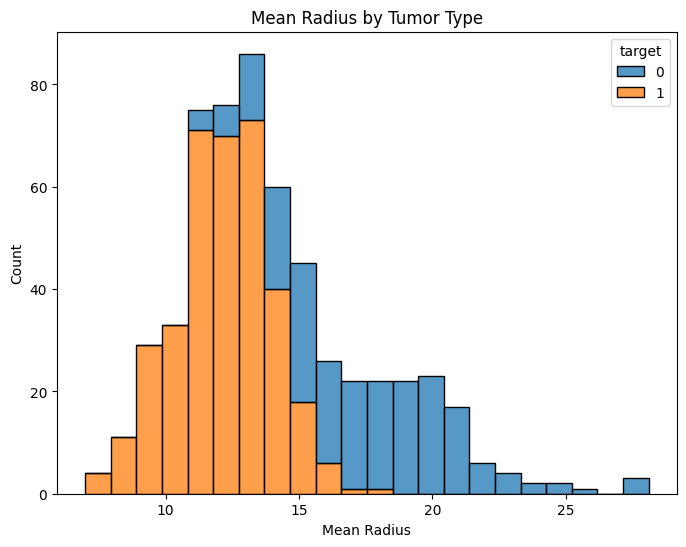


Accuracy: 0.96
Precision: 0.97
Recall: 0.96


<Figure size 600x600 with 0 Axes>

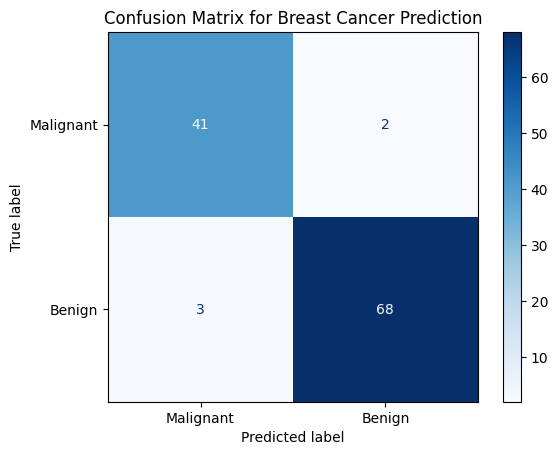

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 2. Exploratory Data Analysis (EDA)
print("\nTask 10: Breast Cancer Prediction")
print("Dataset Info:")
print(df.info())

# Class balance
print("\nClass Balance (0=Malignant, 1=Benign):")
print(df['target'].value_counts())

# Visualize feature distributions (e.g., mean radius)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='mean radius', hue='target', multiple='stack')
plt.title('Mean Radius by Tumor Type')
plt.xlabel('Mean Radius')
plt.ylabel('Count')
plt.show()

# 3. Prepare data
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train the model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Breast Cancer Prediction')
plt.show()